# <center>FLIGHT DELAY PREDICTIONS</center>

<center><img src="https://www.webintravel.com/wp-content/uploads/2020/05/den-belitsky-GettyImages-854673918-scaled.jpg" width="700"></center>

### Importing Libraries

In [23]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

### Getting our Data

In [24]:
flights = pd.read_csv('./input/flights.csv')
flights

/var/folders/52/14hdcd_d3451gmf6wbwp_lsc0000gn/T/ipykernel_1916/1842471722.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('./input/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
flights_needed_data = flights[0:100000]  # getting a segment 

In [26]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,...,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,...,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,...,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,...,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
flights_needed_data.info()  # for an insight into the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [28]:
flights_needed_data.value_counts('DIVERTED')  # will tell us the no. of flights which were diverted

DIVERTED
0    99776
1      224
Name: count, dtype: int64

### Data Visualization

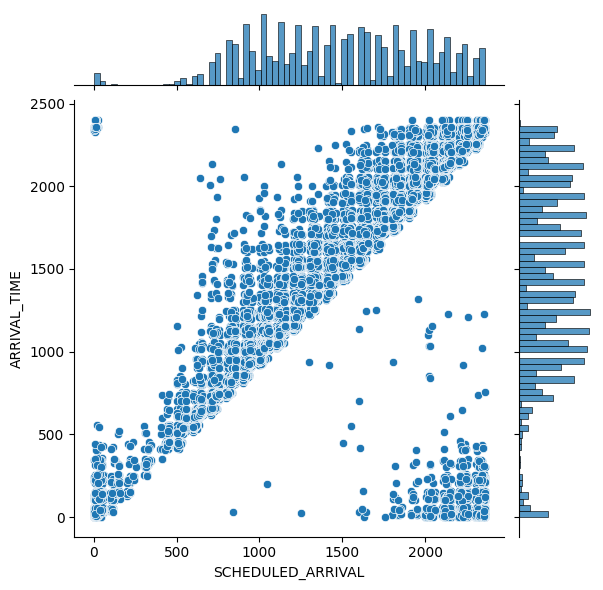

In [29]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [30]:
corr = flights_needed_data.corr(method='pearson')

ValueError: could not convert string to float: 'AS'

In [ ]:
sb.heatmap(corr)

In [ ]:
corr

### Data Preprocessing

In [ ]:
# filtering out unnecessary columns
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [ ]:
flights_needed_data

In [ ]:
# replacing all NaN values with the mean of the attribute in which they are present
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

In [ ]:
flights_needed_data

In [ ]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [ ]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [ ]:
flights_needed_data['result'] = result

In [ ]:
flights_needed_data

In [ ]:
flights_needed_data.value_counts('result')

In [ ]:
# removing some more columns
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

### Splitting Data for Training and Testing

In [ ]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

### Applying Decision Tree Classifier on Training Data

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions and Checking Accuracy

In [ ]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score